[url](https://raw.githubusercontent.com/pydata/pandas/master/doc/data/iris.data)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = "../data/iris.csv"
df = pd.read_csv(data)

In [4]:
df.describe()

SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000

In [11]:
df.Name.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
setosa = df[df["Name"] == "Iris-setosa"]
versicolor = df[df["Name"] == "Iris-versicolor"]
virginica = df[df["Name"] == "Iris-virginica"]

In [13]:
df.mean()

SepalLength    5.843333
SepalWidth     3.054000
PetalLength    3.758667
PetalWidth     1.198667
dtype: float64

In [14]:
df.groupby("Name").mean()

SepalLength  SepalWidth  PetalLength  PetalWidth
Name                                                             
Iris-setosa            5.006       3.418        1.464       0.244
Iris-versicolor        5.936       2.770        4.260       1.326
Iris-virginica         6.588       2.974        5.552       2.026

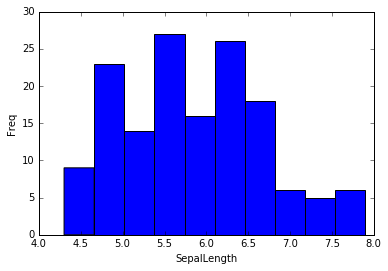

In [17]:
fig = plt.figure()
plt.hist(df.SepalLength)
plt.xlabel("SepalLength")
plt.ylabel("Freq")
plt.show()

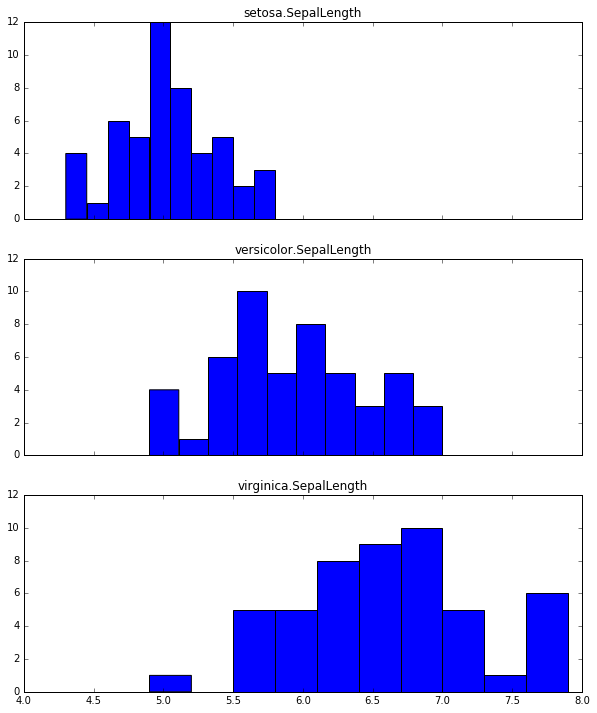

In [38]:
fig, axes=plt.subplots(nrows=3, ncols=1, figsize=(10, 12), sharex=True, sharey=True)
axes[0].hist(setosa.SepalLength)
axes[0].set_title("setosa.SepalLength")
axes[1].hist(versicolor.SepalLength)
axes[1].set_title("versicolor.SepalLength")
axes[2].hist(virginica.SepalLength)
axes[2].set_title("virginica.SepalLength")
plt.savefig("../images/Iris-SepalLength.png")
plt.show()

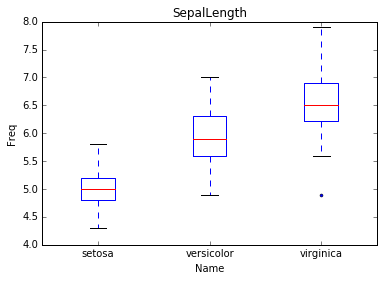

In [47]:
SepalLenghs = [setosa.SepalLength, versicolor.SepalLength, virginica.SepalLength]
plt.boxplot(SepalLenghs, sym="k.")
plt.title("SepalLength")
plt.xlabel("Name")
plt.ylabel("Freq")
ax = plt.gca()
plt.setp(ax, xticklabels= ["setosa", "versicolor", "virginica"])
plt.show()

## 2変量の散布図

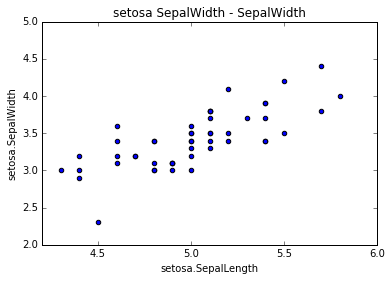

In [102]:
plt.scatter(setosa.SepalLength, setosa.SepalWidth)
plt.xlabel("setosa.SepalLength")
plt.ylabel("setosa.SepalWidth")
plt.title("setosa SepalWidth - SepalWidth")
plt.show()

## 2変量の相関係数

In [100]:

corrcoef1 = np.corrcoef(setosa.SepalLength, setosa.SepalWidth)[0, 1]
corrcoef1

0.74678037326392677

## 散布図行列

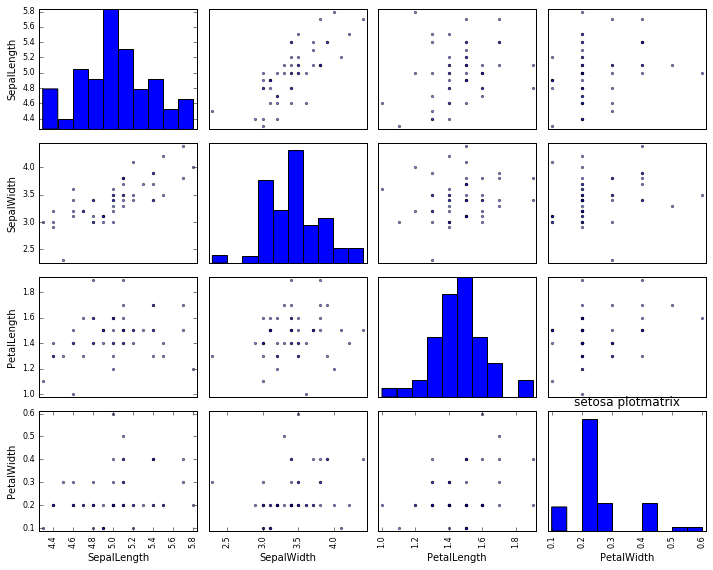

In [99]:
pd.tools.plotting.scatter_matrix(setosa, figsize=(10, 8))
plt.tight_layout()
plt.title("setosa plotmatrix")
plt.savefig("../images/setosa-plotmatrix.png")
plt.show()

## 単回帰分析

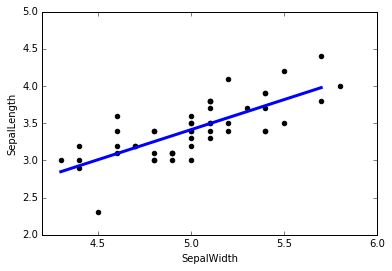

[[ 0.80723367]]
[-0.62301173]
0.56%


In [98]:
from sklearn import linear_model
LinearRegr = linear_model.LinearRegression()
X = np.asarray(setosa[["SepalLength"]])
Y = np.asarray(setosa[["SepalWidth"]])

LinearRegr.fit(X, Y)
plt.scatter(X, Y, color="black")
px = np.arange(X.min(), X.max(), 0.1)[:, np.newaxis]
py = LinearRegr.predict(px)
plt.plot(px, py, color="blue", linewidth="3")
plt.xlabel("SepalWidth")
plt.ylabel("SepalLength")
plt.show()
print(LinearRegr.coef_) # 回帰係数
print(LinearRegr.intercept_) # 切片

# モデルの当てはまり （決定係数, %）
print("%.2f" % LinearRegr.score(X, Y) + "%")

## 重回帰分析

In [103]:
LinearRegr2 = linear_model.LinearRegression()
X2 = setosa[["SepalLength", "PetalLength", "PetalWidth"]]
Y2 = setosa[["SepalWidth"]]
LinearRegr2.fit(X2, Y2)
LinearRegr2.score(X2, Y2)

0.56492621264573206

## ロジスティック回帰分析

In [138]:
import sklearn
usedata = np.logical_or(df["Name"] == "Iris-setosa", df["Name"] == "Iris-virginica")
setosa_virginica = df[usedata] # setosa と　virginica を抽出

X3 = setosa_virginica[["SepalLength", "SepalWidth"]]
Y3 = setosa_virginica["Name"] == "Iris-setosa"
LogRegr = linear_model.LogisticRegression(C=1.0)
LogRegr.fit(X3, Y3)

print(LogRegr.coef_) # 偏回帰係数
print(LogRegr.intercept_) # 切片
print(pd.crosstab(Y3, LogRegr.predict(X3)))

[[-2.15056433  3.53948104]]
[ 0.94024115]
col_0  False  True 
Name               
False     50      0
True       1     49


### モデルの結果をグラフにして確認する

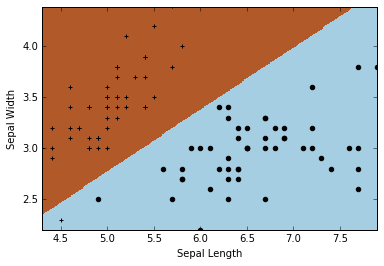

In [159]:
xMin = X3.SepalLength.min()
xMax = X3.SepalLength.max()

yMin = X3.SepalWidth.min()
yMax = X3.SepalWidth.max()

xx, yy = np.meshgrid(np.arange(xMin, xMax, 0.01), np.arange(yMin, yMax, 0.01))
Z = LogRegr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X3["SepalLength"][Y3 == 0], X3["SepalWidth"][Y3 == 0], marker="o", c="black")
plt.scatter(X3["SepalLength"][Y3 == 1], X3["SepalWidth"][Y3 == 1], marker="+", c="black")

plt.show()

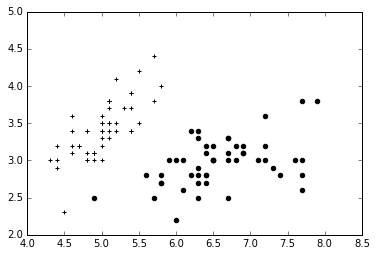

In [152]:
plt.scatter(X3["SepalLength"][Y3 == 0], X3["SepalWidth"][Y3 == 0], marker="o", c="black")
plt.scatter(X3["SepalLength"][Y3 == 1], X3["SepalWidth"][Y3 == 1], marker="+", c="black")

plt.show()



## 決定木の構築

In [180]:
from sklearn import tree
X4 = df[["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]]
Y4 = df[["Name"]]
treeCIF = tree.DecisionTreeClassifier(max_depth=3)
treeCIF.fit(X4, Y4)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [181]:
from sklearn.externals.six import StringIO
with open("tree_depth3.dot", "w") as f:
    f = tree.export_graphviz(treeCIF, out_file=f, feature_names=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"])

.dotファイルを pngに変換  
dot -Tpng tree.dot -o tree.png

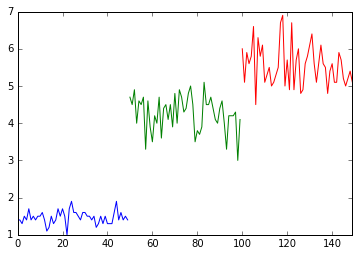

In [178]:
df.groupby("Name").PetalLength.plot()
plt.show()

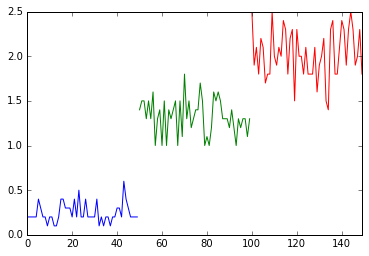

In [179]:
df.groupby("Name").PetalWidth.plot()
plt.show()

## クラスタ分析 kmean法

In [205]:
# k-means法
from sklearn import cluster

x1 = "PetalWidth"
y1 = "PetalLength"

X5= df[[x1, y1]]
kmeansCls = cluster.KMeans(n_clusters=3,  random_state=71)
kmeansCls.fit(X5)
print(kmeansCls.predict(X5)) # クラスタリングした結果

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2]


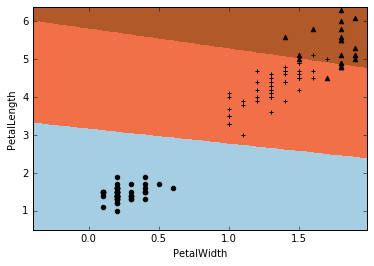

In [211]:
# k-means法の可視化
def category2int(x):
    category = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
    return category[x]

f = lambda x: category2int(x)
Y5 = df["Name"].map(f)

xMin = X5[x1].min() - 0.5
xMax = X5[x1].max() - 0.5

yMin = X5[y1].min() - 0.5
yMax = X5[y1].max() - 0.5


xx, yy = np.meshgrid(np.arange(xMin, xMax, 0.01), np.arange(yMin, yMax, 0.01))
Z = kmeansCls.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xlabel(x1)
plt.ylabel(y1)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X5[x1][Y5 == 0], X5[y1][Y5 == 0], marker="o", c="black")
plt.scatter(X5[x1][Y5 == 1], X5[y1][Y5 == 1], marker="+", c="black")
plt.scatter(X5[x1][Y5 == 2], X5[y1][Y5 == 2], marker="^", c="black")
plt.show()